In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get cell chain
cell_list = pd.read_csv("cells_by_similarity_dfs_0.000.txt", delimiter="\t", index_col=False)
cell_order_first = 1
num_cells_sampled = 17
cells_sampled = cell_list["Cell"][cell_order_first:cell_order_first + num_cells_sampled].to_numpy()

# load summary for each cell sampled
result_dir = "../../result/stan-calcium-model-100-3"
rhat = np.zeros(num_cells_sampled)
for i, cell in enumerate(cells_sampled):
    summary_path = os.path.join(result_dir, "cell-{:04d}".format(cell),
                                "stan_fit_summary.csv")
    summary = pd.read_csv(summary_path, index_col=0)
    rhat[i] = summary.loc["lp__", "Rhat"]

rhat_table = pd.DataFrame({"R_hat": rhat}, index=cells_sampled)

,R_hat
5057,1.054502
5119,1.060719
5096,1.019358
5099,129.860500
5095,3.387149
5087,1.061697
5098,106.433842
5125,1.011577
5124,37.250095
5107,1.113329


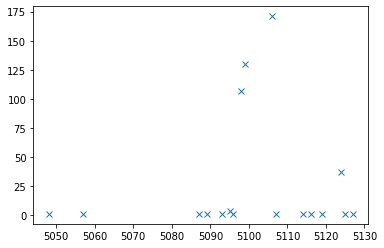

In [2]:
display(rhat_table)
plt.plot(cells_sampled, rhat, "x")